In [1]:
# !unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

In [6]:
# from google.colab import drive
drive.mount('/content/drive')

NameError: ignored

# End-to-end multi-class dog breed classification
Using tensorFlow 2.0 and TensorFlow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog

##2. Data
using kaggle's dog breed identification

##3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

##4. Features
Data:
* unstructured data (images)
* using deep learning/transfer learning.
* 120 breed of dogs 120 different classes
* 10000+ images of train and test images with labels and without labels

In [7]:
# import tensorflow 2.x
import tensorflow as tf
print("Tf version:",tf.__version__)

Tf version: 2.12.0


In [8]:
# import tensorflow hub
import tensorflow_hub as hub
print("Tf hub version:",hub.__version__)

Tf hub version: 0.14.0


In [9]:
# check for gpu availablity
print("GPU","available (YESSSS!!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (YESSSS!!!)


# getting our data ready
## turning our images into tensors (numerical representations)

In [10]:
# checkout labels of our dat
import pandas as pd
labels_csv= pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

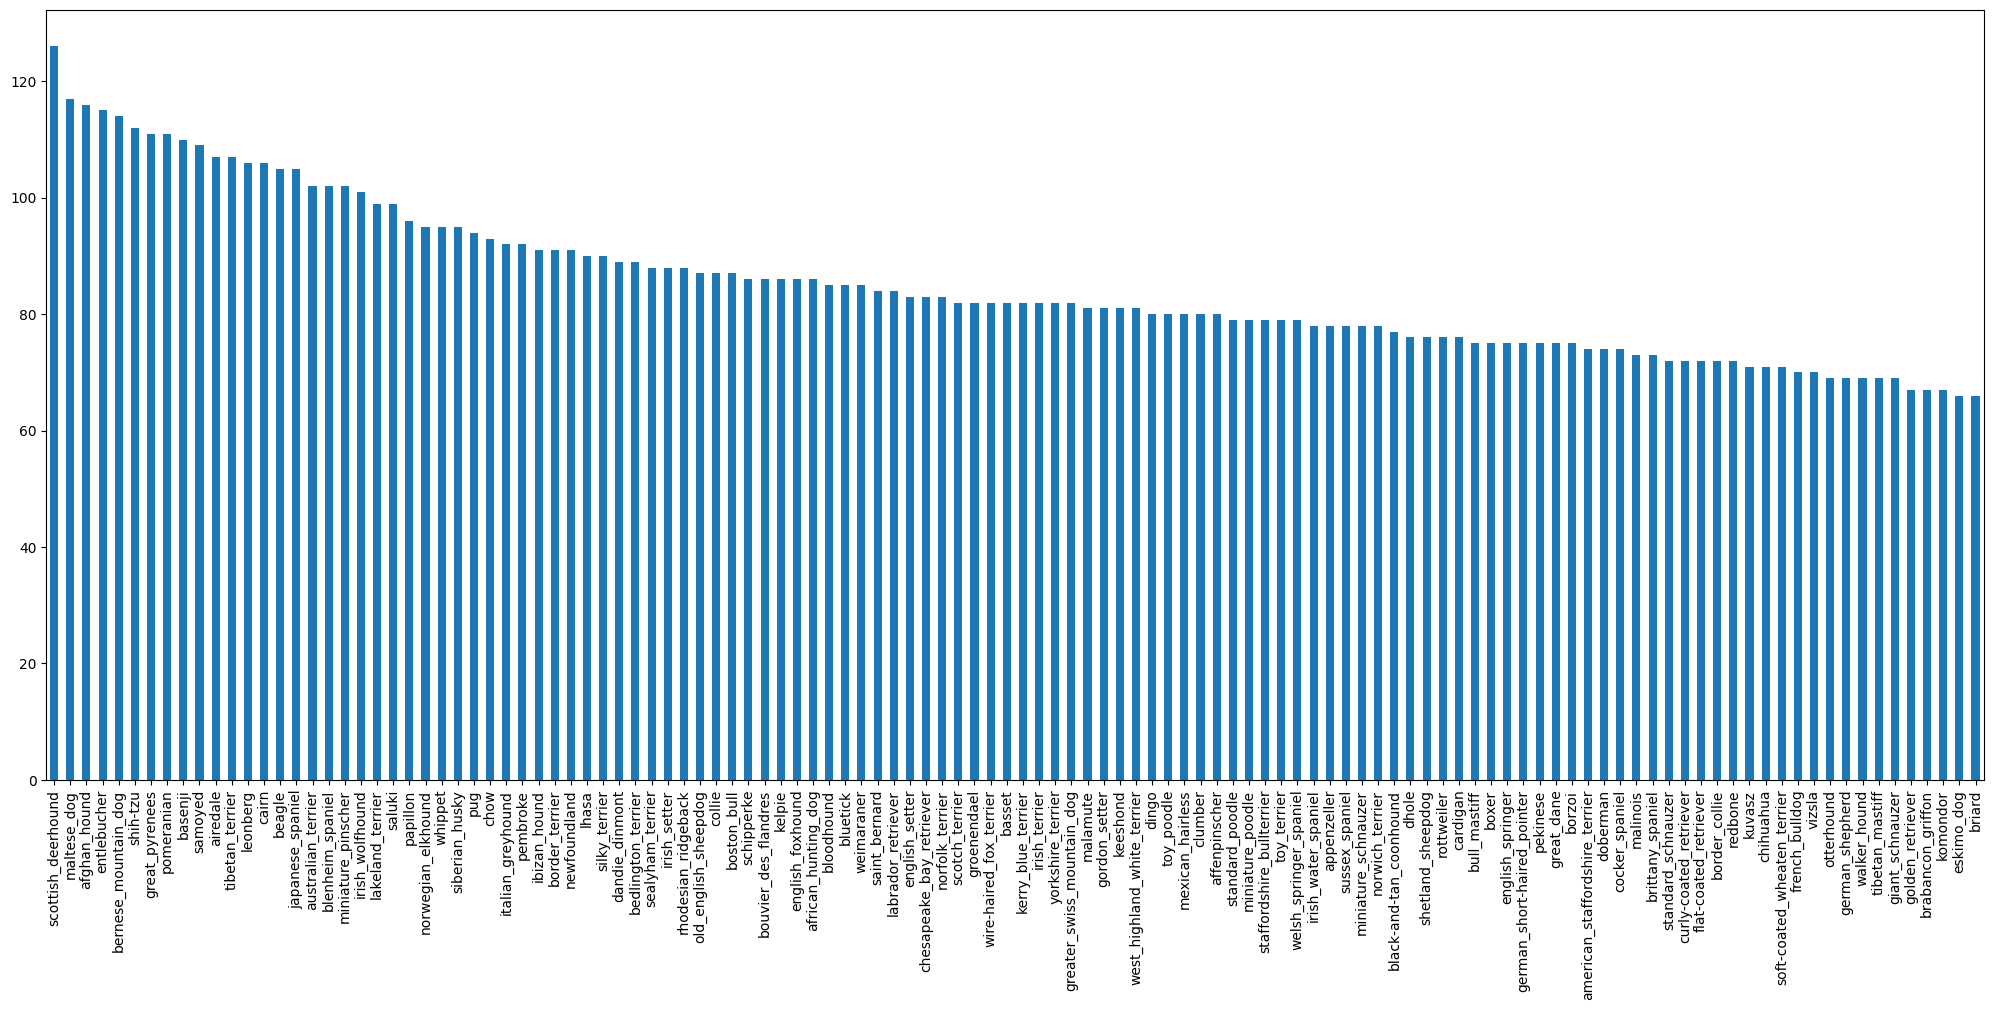

In [11]:
# how many images are there of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(25,10));

In [12]:
labels_csv["breed"].value_counts().median()

82.0

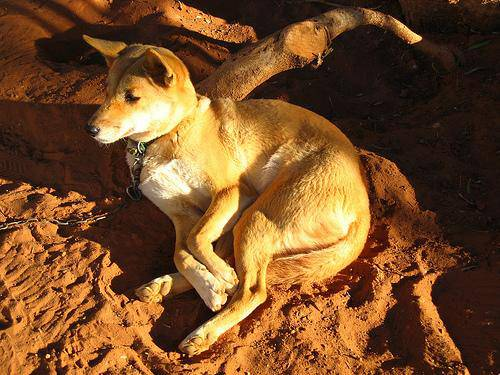

In [13]:
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

In [14]:
# create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Vision/train/"+fname+".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [15]:
# check no of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/"))== len(filenames):
  print("Filenames match actual amout of files")
else:
  print("do not match")

Filenames match actual amout of files


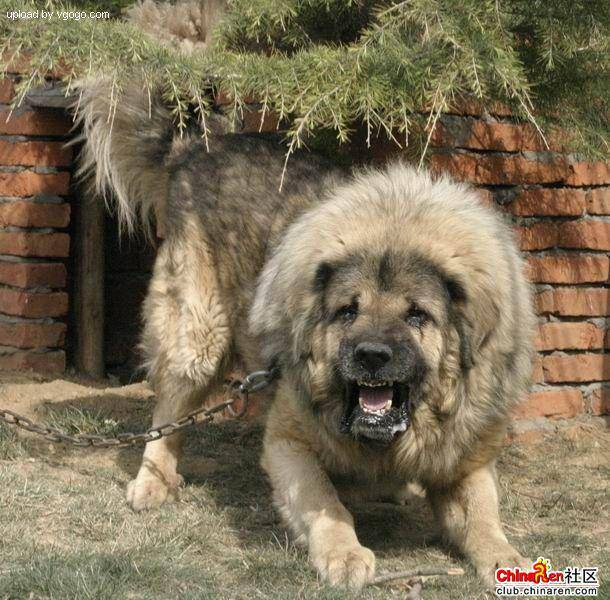

In [16]:
# Check an image directly from a filepath
Image(filenames[9000])

In [17]:
labels_csv["breed"][9000]

'tibetan_mastiff'

## Prepare our labels

In [18]:
import numpy as np
labels = np.array(labels_csv["breed"])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
len(labels)

10222

In [20]:
# see if no of labels matches the number of filenames

if len(labels)== len(filenames):
  print("Filenames match actual amout of labels")
else:
  print("do not match")

Filenames match actual amout of labels


In [21]:
# find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [22]:
# turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
# turn every label into boolean array
boolean_labels = [label== unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
len(boolean_labels)

10222

In [25]:
# turn boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds  == labels[0]))# index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [26]:
# setup x and y variables
x = filenames
y= boolean_labels

experementing with 1000 images and then increse if needed

In [27]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [28]:
# split our data into train and validation
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES], test_size=0.2,random_state=42)

In [29]:
len(x_train), len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

### Preprocessing images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, image.
3. Turn our image (a jpeg file) into Tensors.
4. Resize the image to be of shape (224, 224).
5. Return the modified image.

In [30]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [31]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [32]:
# Define image size
IMG_SIZE = 224

def process_image(image_path,img_size= IMG_SIZE):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image



## Turning data into batches
batch size = 32
Using tensor flow effectivly we need our data in the form of tensor tuples which look like this:
(image,label)

In [33]:
# create a simple function to return a tuple (image, label)
def get_image_label(image_path,label):
  """
  takes an image file path name and assosiated label,
  and get the image then return tuple
  """

  image = process_image(image_path,label)
  return image, label

In [34]:
# Demo of above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have our data into tuples of tensors in form (image, label), lets make function call to turn all of our data (x & y) into batches

In [35]:
#define the batch size, 32 is a good start
BATCH_SIZE= 32

# making batches
def create_data_batches(x,y=None, batch_size= BATCH_SIZE,valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
# test data
  if test_data:
    print("Creating test data batches...")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch= data.map(process_image).batch(BATCH_SIZE)
    return data_batch
# valid dataset, dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # filepaths, labels
    data_batch= data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    # turn filepaths and labels into tensors
    data= tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    # shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data= data.shuffle(buffer_size=len(x))
    # create (image,lable) tuples also turn image path into preprocessed image
    data=data.map(get_image_label)
    # turn data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch



In [36]:
# creating training and validation data batches
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [37]:
# checking attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### visualizing data batches

In [38]:
import matplotlib.pyplot as plt
# function for viewing 25 images
def show_25_images(images,labels):
  # setup the figure
  plt.figure(figsize=(10,10))
  # looping through 25 images
  for i in range(25):
    # create subplots (5 rows, 5 cols)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[y[i].argmax()])
    # turn  grid lines of
    plt.axis("off")

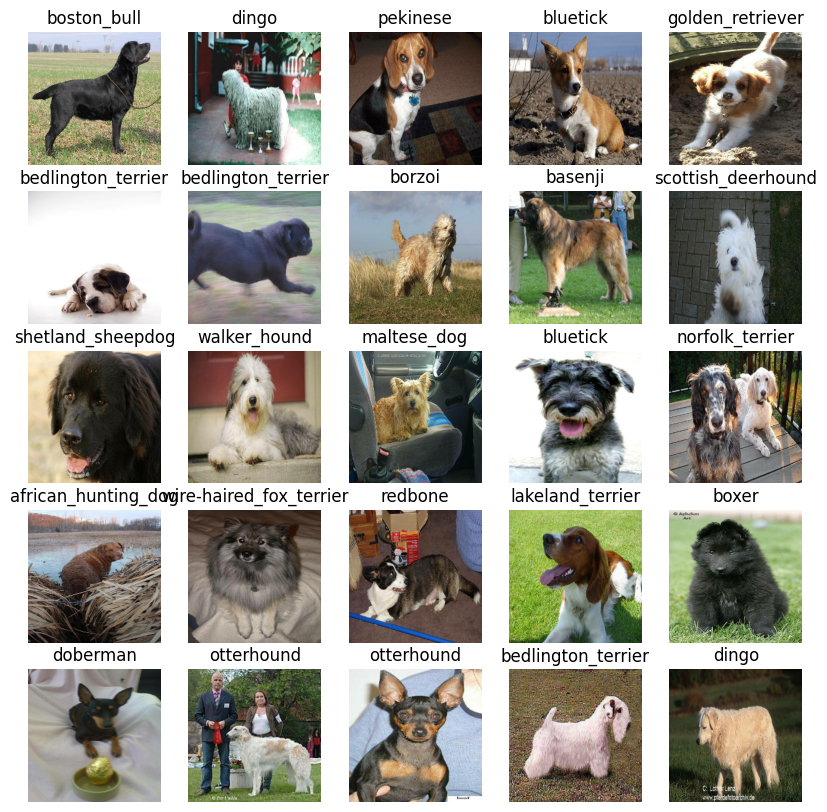

In [39]:
# now visualizing the batch data
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

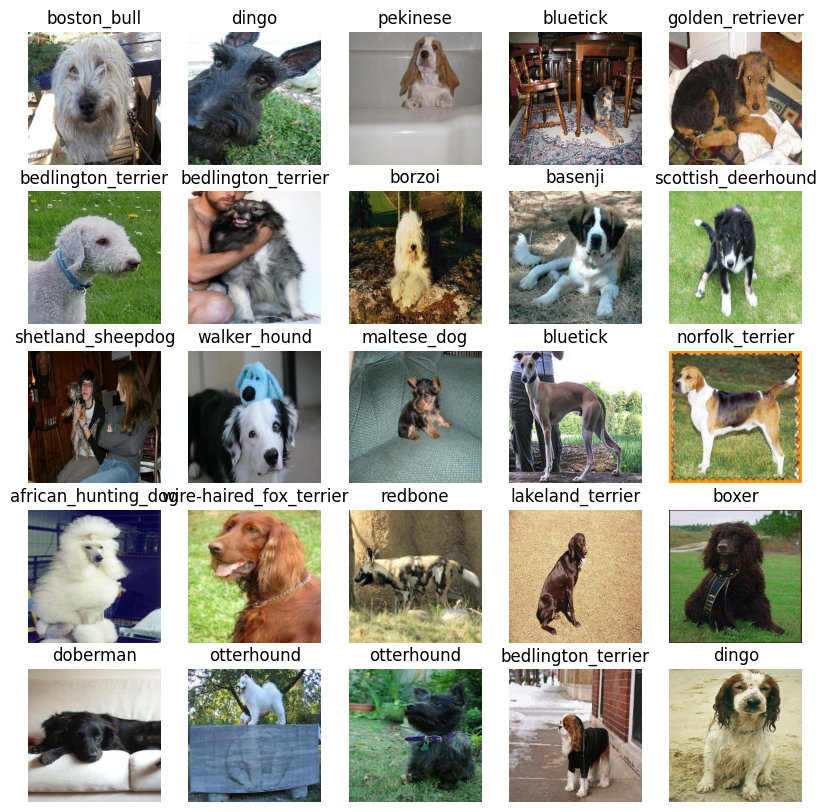

In [40]:
# visualizing our validation set
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

### Building a model

- the input shape (our images shape, in the form of tensors) to our model.
- the output shape (image labels, in the form of tensors) of our model.
- the URL of the model we want to use.

In [41]:
# setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE,3] #batch,height,width,color channels

# setup output shape of our model
OUTPUT_SHAPE=len(unique_breeds)

# setup model url from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

input, output and model is ready now,
lets put them together into a keras deep learning model!

- Takes the input shape, output shape and the model we've chosen's URL as parameters.
- Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
- Compiles the model (says how it should be evaluated and improved).
- Builds the model (tells it what kind of input shape it'll be getting).
- Returns the model.

In [42]:
# create a function which builds a keras model

def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("building model with: ", MODEL_URL)

  # setup model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
      tf.keras.layers.Dense(units= OUTPUT_SHAPE,
                            activation="softmax")#layer 2 (output layer)

  ])

  # compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [43]:
model = create_model()
model.summary()

building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
callbacks are helper functions a model use during training to dos such things as save its progress, check its progress or stop training early if a model stops improving.

we create two callbacks
- TensorBoard helps track models progress
- early stopping helps in prevents our model from training for two long

In [44]:
# To setup TensorBoard callback
# Load the TensorBoard notebook extension
%load_ext tensorboard
# 2. create a tensorboard callback which is able to save logs to a directory
#    and pass it to models fit function.
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)
# 3. visualize our models training logs with the %tensorboard magic function




In [45]:
# setup early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## training a model (on subset of data)
Only train 1000 images

In [46]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}

In [47]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


In [48]:
# # train model
# def train_model():

#   # create a model using create_model()
#   model = create_model()
#   # setup tensorboard callback using create_tensorboard_callback()
#   # tensorboard = create_tensorboard_callback()
#   # call fit pass train,valid data,no of epochs and callback we like to use
#   model.fit(x=train_data,
#             epochs=NUM_EPOCHS,
#             validation_data=val_data,
#             validation_freq=1, # check validation metrics every epoch
#             callbacks=[tensorboard, early_stopping])
# # return model
#   return model

In [49]:
# fit the model to the data
# model=train_model()

Model overfits

###checking the tensorboard logs


In [50]:
# %tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

## Making and evaluating predictions using a trained model

In [51]:
# predictions on validation data
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 136s 21s/step


array([[0.00664999, 0.00245383, 0.00238683, ..., 0.00180905, 0.00143327,
        0.00169495],
       [0.01080877, 0.0169474 , 0.00286201, ..., 0.00472819, 0.00510183,
        0.00766904],
       [0.00020758, 0.00112102, 0.00409488, ..., 0.00269326, 0.02071675,
        0.00479936],
       ...,
       [0.00056297, 0.00075624, 0.00715454, ..., 0.00044381, 0.00308088,
        0.00194877],
       [0.01258195, 0.00321688, 0.00733666, ..., 0.0004574 , 0.00875928,
        0.01536703],
       [0.00184237, 0.00072586, 0.01470328, ..., 0.00030237, 0.00054345,
        0.00355868]], dtype=float32)

In [52]:
predictions.shape # y_val, unique_breeds

(200, 120)

In [53]:
np.sum(predictions[1])

1.0

input image is 224x224x3  and softmax layer converts it into array of numbers like above with len of 120


predictions are assosiated probability of likeliness that what our model thinks of a certain image is
predictions[0]-> 120 labels and with each label there is probability value, so the higer prob value for a label the higher chances is that the image belongs to that label and sum is equal to 1.


softmax -> each component will be in interval (0,1) and component will add up to 1.

In [54]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[0.00664999 0.00245383 0.00238683 0.00120815 0.0022604  0.00292551
 0.00118959 0.00024076 0.00074821 0.00791555 0.00046397 0.00042588
 0.05507135 0.00227694 0.00229917 0.00438242 0.00240153 0.00339843
 0.00153267 0.00017006 0.00604864 0.00029893 0.00066751 0.02371889
 0.00082364 0.00095162 0.01390318 0.00451331 0.00022706 0.00076182
 0.00504389 0.00061389 0.00075349 0.00526184 0.00481608 0.00050933
 0.01674582 0.00717751 0.00037301 0.05189141 0.00091255 0.00906727
 0.00770071 0.00692056 0.00121221 0.00049679 0.01147009 0.00264154
 0.00270188 0.00100897 0.00121611 0.00809647 0.0027559  0.00232391
 0.02524966 0.00426844 0.00055507 0.00504402 0.00128689 0.00420324
 0.00465895 0.00867301 0.00122542 0.00409254 0.05415827 0.00235346
 0.01117331 0.08985332 0.00062555 0.00213318 0.00904462 0.00091618
 0.0169463  0.00647868 0.00465334 0.01215622 0.00028673 0.00851079
 0.01067738 0.00106837 0.00495299 0.00936465 0.00328496 0.00032437
 0.00703602 0.00010761 0.00918207 0.07872661 0.02623421 0.0059

In [55]:
# turn probabilites into respective label
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]
# get predicted label based on array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'flat-coated_retriever'

In [56]:
val_data #images, truth labels

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

 unbatch validation data to make predictions on validation image and compare predictions to validation labels

In [57]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we have
- prediction labels
- validation labels (truth labels)
- validation images
Now let us visualize



In [58]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

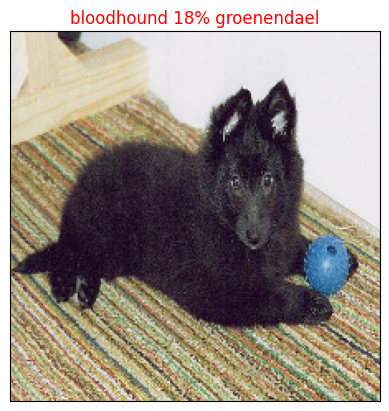

In [59]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

In [60]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

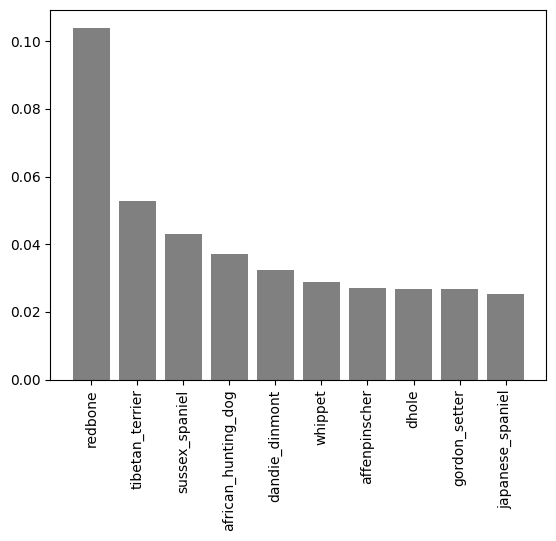

In [61]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=34)

Now we've got some function to help us visualize our predictions and evaluate our modle, let's check out a few.

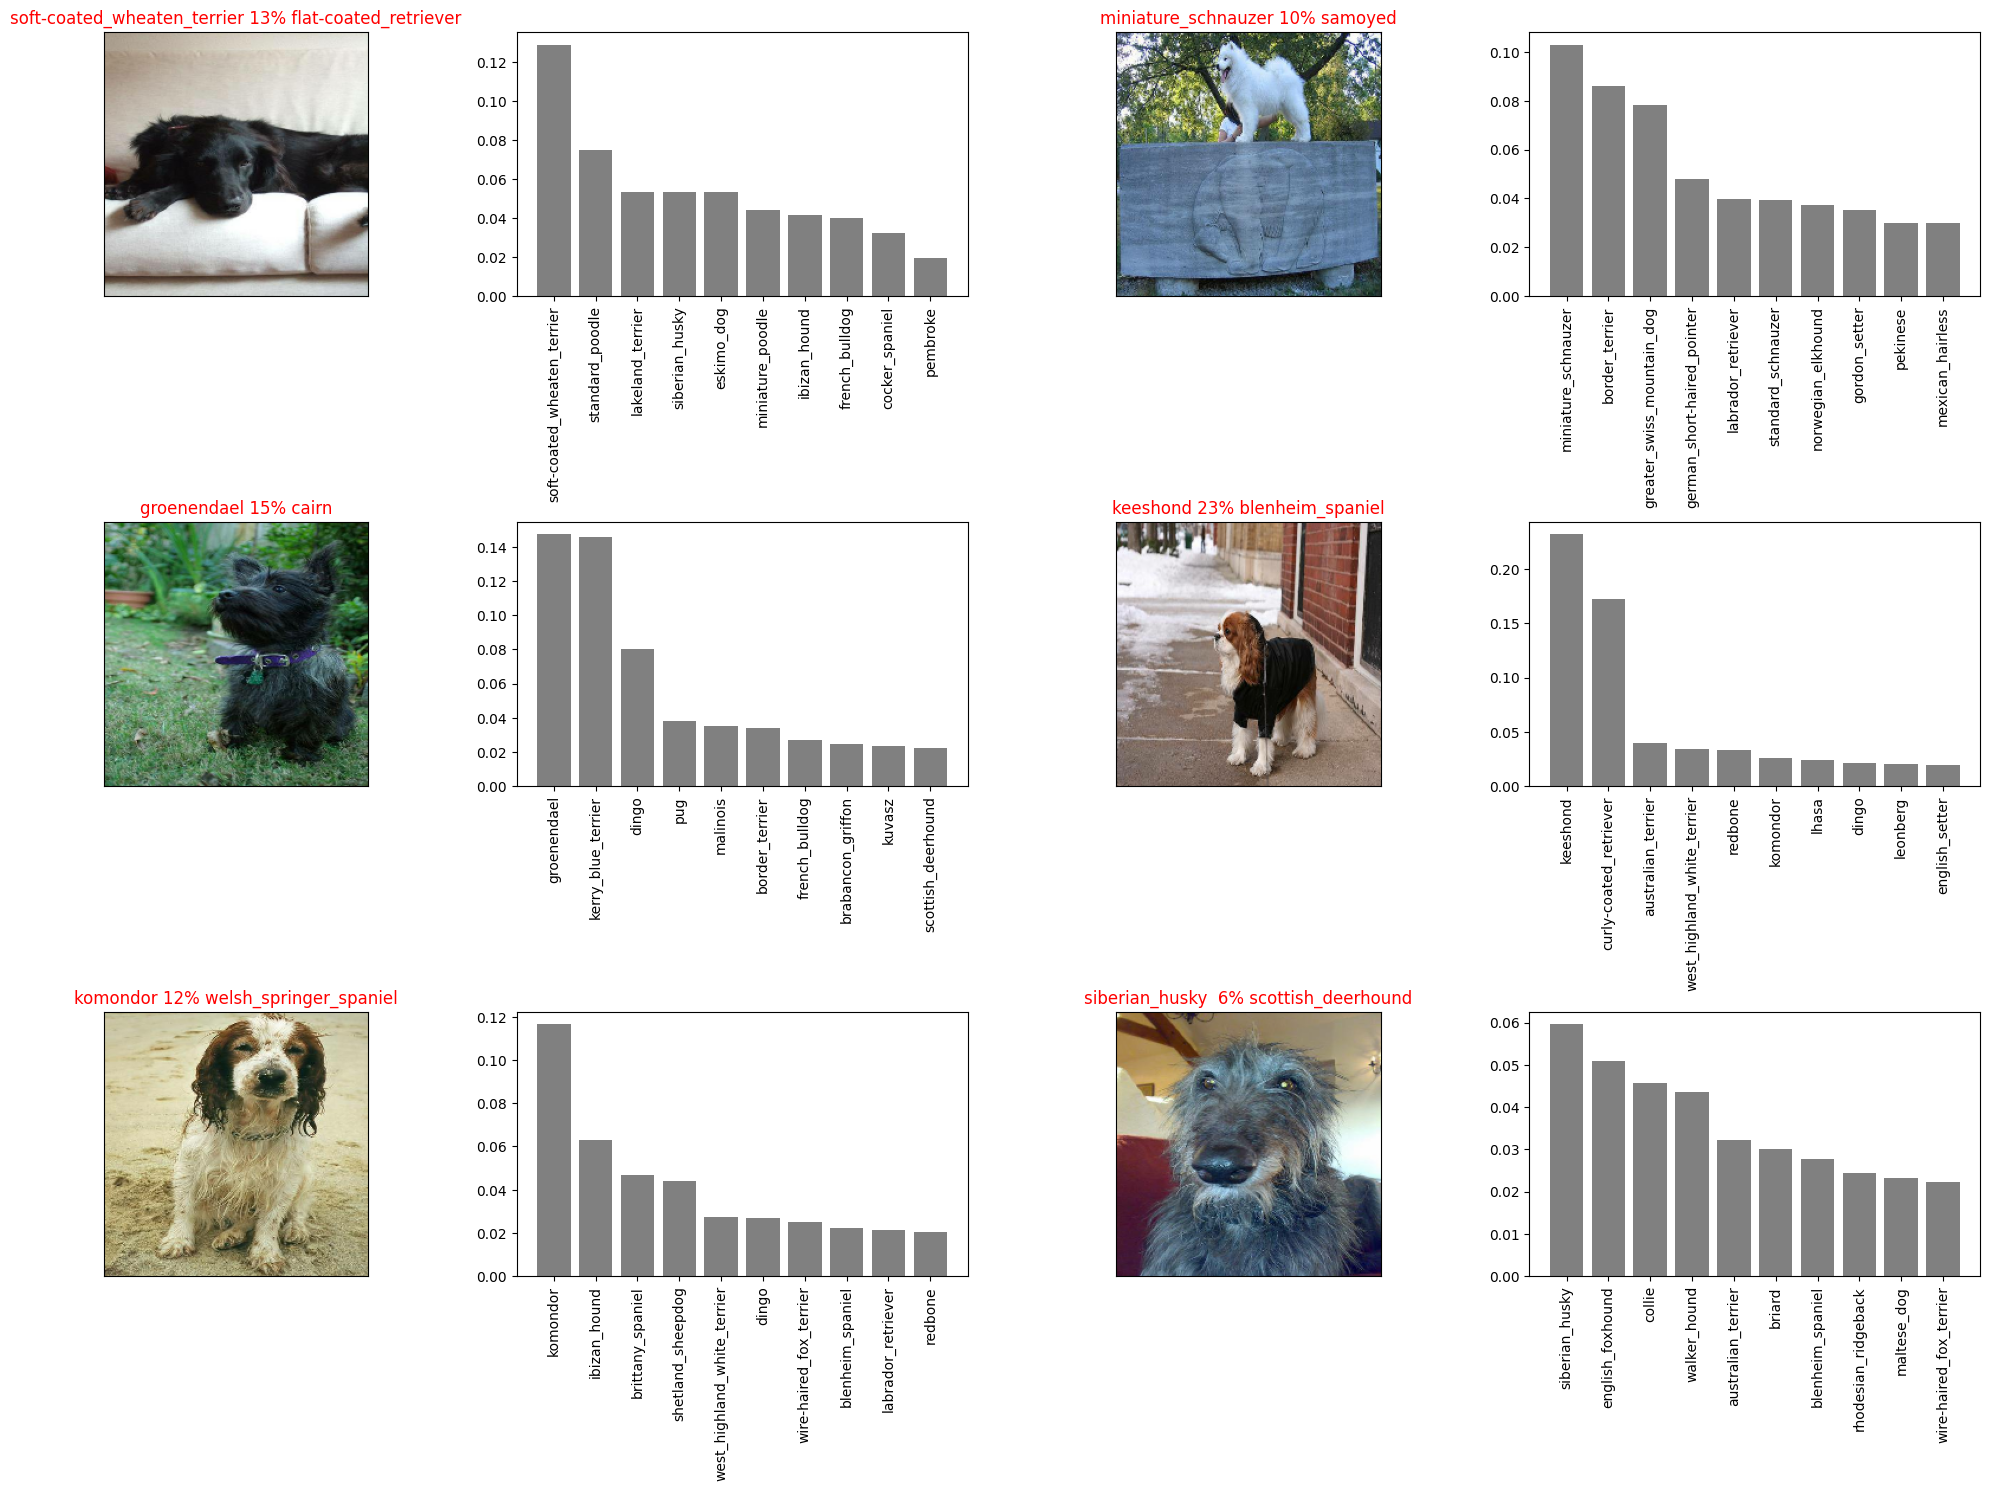

In [62]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Training a big dog model 🐶 (on the full data)

In [63]:
len(y), len(y)

(10222, 10222)

In [64]:
# Create a data batch with the full data set
full_data = create_data_batches(x, y)

Creating training data batches...


In [65]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [66]:
# Create a model for full model
# full_model = create_model()


In [67]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [68]:
# # Fit the full model to the full data
# full_model.fit(x=full_data,
#                epochs=NUM_EPOCHS,
#                callbacks=[full_model_tensorboard, full_model_early_stopping])

Save and load model

In [69]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

  # Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [70]:

# save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

In [71]:
# # Load in the full model
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20230314-18161678817806-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20230314-18161678817806-full-image-set-mobilenetv2-Adam.h5


# Making predictions on the test dataset

In [72]:
# Load test image filenames
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/e0e3eb01e80b1d694a47b23909e158ec.jpg',
 'drive/My Drive/Dog Vision/test/e37d651b9b5fdcf26ab37259fac877d1.jpg',
 'drive/My Drive/Dog Vision/test/e5c0666aa15120eba4718ae947a52c45.jpg',
 'drive/My Drive/Dog Vision/test/e3c97ed588b32f49c7aae65cf91f17ba.jpg',
 'drive/My Drive/Dog Vision/test/e06ce40d62d3d198f2df70349104a002.jpg',
 'drive/My Drive/Dog Vision/test/e1e79b3edfb3579e46ad914bf755dbbc.jpg',
 'drive/My Drive/Dog Vision/test/e09859cae41cb59228518c09c3b27362.jpg',
 'drive/My Drive/Dog Vision/test/e0165801e47527205e45295aba441972.jpg',
 'drive/My Drive/Dog Vision/test/dcb5d319bd013bbfa9779d8c6c11a829.jpg',
 'drive/My Drive/Dog Vision/test/df645ae75554d4d7130bfa1b72be53ce.jpg']

In [73]:
len(test_filenames)

10357

In [74]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [75]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [76]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 158s 477ms/step


In [77]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [78]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter=",")

In [79]:
test_predictions.shape

(10357, 120)

# Preparing test dataset predictions for Kaggle
 https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

In [80]:
# # Create a pandas DataFrame with empty columns
# preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
# preds_df.head()

In [81]:
# # Append test image ID's to predictions DataFrame
# test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
# preds_df["id"] = test_ids

In [82]:
# preds_df.head()

In [83]:

# # Add the prediction probabilities to each dog breed column
# preds_df[list(unique_breeds)] = test_predictions
# preds_df.head()

In [84]:
# # Save our predictions dataframe to CSV for submission to Kaggle
# preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predictions_submission_1_mobilenetV2.csv",
#                 index=False)

In [85]:
# import os
# Get custom image filepaths
custom_path = "drive/MyDrive/Dog Vision/custom-test-dog-photos/"



custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [86]:
custom_image_paths

['drive/MyDrive/Dog Vision/custom-test-dog-photos/poodle.jpg',
 'drive/MyDrive/Dog Vision/custom-test-dog-photos/japani.jpg',
 'drive/MyDrive/Dog Vision/custom-test-dog-photos/m.jpg']

In [87]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [88]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [89]:
custom_preds.shape

(3, 120)

In [90]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['standard_poodle', 'japanese_spaniel', 'malinois']

In [91]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

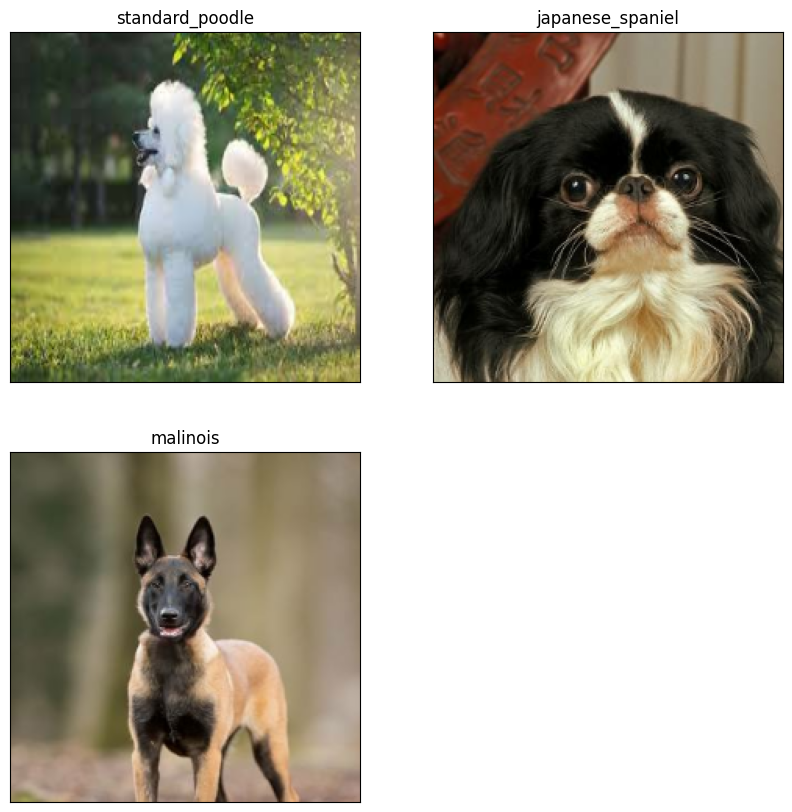

In [92]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(2, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

In [93]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      